In [ ]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-v0.1").to("cuda")


# image.save("飞流.png")


In [ ]:
prompt = '《春晓》是唐代诗人孟浩然的一首五言古诗，主要描绘了春天的清晨，诗人醒来后瞬间的感受和联想。 诗的首句“春眠不觉晓”，写春夜睡眠香甜，天亮了也不知道。这一句看似平淡无奇，却充满了对春天的喜爱之情。春天的睡眠总是那么甜美，仿佛一切烦恼都被温暖的春风化解了。 第二句“处处闻啼鸟”，写醒来的瞬间，到处都可以听到鸟儿的啼鸣。这一句既描绘了春天的生机勃勃，也暗示了诗人内心的愉悦和轻松。 第三、四句“夜来风雨声，花落知多少”，是诗人由鸟儿的啼鸣联想到昨夜的风雨，并猜测有多少花朵在风雨中凋落。这两句充满了对自然变化的敏感和感慨，也展现了诗人对美好事物的珍惜和留恋。 整首诗语言简洁，意境深远，充满了对春天的热爱和对生活的感悟。它告诉我们，生活中的美好往往就在我们身边，只要我们用心去感受，去珍惜，就能发现它的存在。'
image = pipe(prompt, guidance_scale=7.5).images[0]  

In [ ]:
image

# 上面是全精度的,感觉一点太慢了


In [ ]:
# !pip install git+https://github.com/huggingface/accelerate
import torch
from diffusers import StableDiffusionPipeline
torch.backends.cudnn.benchmark = True
pipe = StableDiffusionPipeline.from_pretrained("IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Chinese-v0.1", torch_dtype=torch.float16)
pipe.to('cuda')



In [ ]:
prompt = '飞流直下三千尺，油画'
image = pipe(prompt, guidance_scale=7.5).images[0]  
# image.save("飞流.png")

In [ ]:
image

# 但我感觉下面这个半精度的生成图片也好慢,但不知道是不是因为上面的全精度的模型已经下载好了,所以下面的半精度模型加载起来就很快了

--- 

## 接下来试一下字节跳动的中文文生图模型


In [1]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file

In [2]:
base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_4step_unet.safetensors" # Use the correct ckpt for your step setting!


In [3]:
# Load model.
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\diffusers\configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


sdxl_lightning_4step_unet.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--ByteDance--SDXL-Lightning. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--stabilityai--stable-diffusion-xl-base-1.0. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

(…)diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

In [5]:
# Ensure using the same inference steps as the loaded model and CFG set to 0.
prompt = "A girl smiling"
# pipe(prompt, num_inference_steps=4, guidance_scale=0).images[0].save("output.png")

  0%|          | 0/4 [00:00<?, ?it/s]

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/4 [00:00<?, ?it/s]

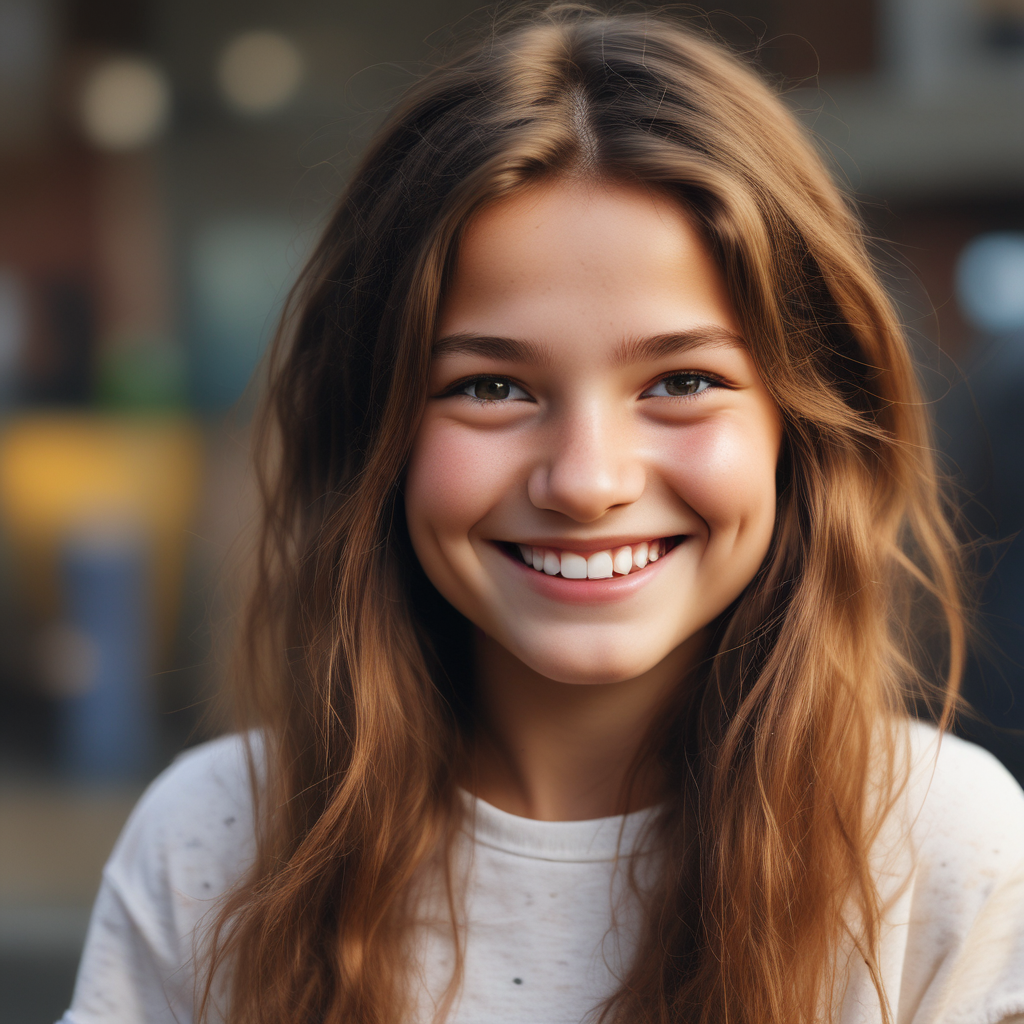

In [6]:
image = pipe(prompt, num_inference_steps=4, guidance_scale=0).images[0]
image

---


## 下面再试试别的

In [1]:
import torch
from diffusers import StableDiffusionPipeline
torch.backends.cudnn.benchmark = True
pipe = StableDiffusionPipeline.from_pretrained("IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Anime-Chinese-v0.1", torch_dtype=torch.float16)
pipe.to('cuda')


model_index.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--IDEA-CCNL--Taiyi-Stable-Diffusion-1B-Anime-Chinese-v0.1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
safety_checker\model.safetensors not found


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/946 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "IDEA-CCNL/Taiyi-Stable-Diffusion-1B-Anime-Chinese-v0.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "BertModel"
  ],
  "tokenizer": [
    "transformers",
    "BertTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (0) is identical to the `bos_token_id` (0), `eos_token_id` (2), or the `sep_token_id` (None), and your input is not padded.


  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\lenovo\anaconda3\envs\cloud\Lib\site-packages\diffusers\models\attention_processor.py:1279: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


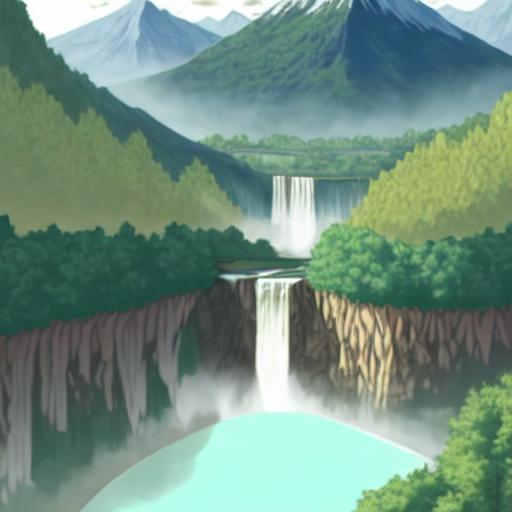

In [2]:

prompt = '高大的山脉上流下巨大的水流瀑布'
image = pipe(prompt, guidance_scale=7.5).images[0]  
image

---


## 下面试试阿里云的文生图  
> 好的 用不了